## 2.4　クラス分類器の不確実性推定

In [24]:
import numpy as np
import mglearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [2]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

y_named = np.array(['blue', 'red'])[y]

print(y[:5])
print(y_named[:5])

[1 1 0 1 1]
['red' 'red' 'blue' 'red' 'red']


In [3]:
# 各引数に対して、trainとtestに分割している
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

print('X:', X.shape)
print('y:', y.shape)
print('y_named:', y_named.shape)
print('\n')
print('X_train:', X_train.shape)
print('y_train_named:', y_train_named.shape)
print('y_train:', y_train.shape)
print('\n')
print('X_test:', X_test.shape)
print('y_test_named:', y_test_named.shape)
print('y_test:', y_test.shape)

X: (100, 2)
y: (100,)
y_named: (100,)


X_train: (75, 2)
y_train_named: (75,)
y_train: (75,)


X_test: (25, 2)
y_test_named: (25,)
y_test: (25,)


引数ごとにtrainとtestへ分割していることが分かれば、この構造はすぐに理解できる。

X → X_train, X_test<br>
y_named → y_train_named, y_test_named<br>
y → y_train, y_test

In [4]:
print(y_train_named[:10])
print(y_train[:10])

['blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'red']
[0 0 0 0 0 0 0 0 0 1]


In [5]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### 2.4.1　決定関数（Decision Function）

In [6]:
print('X_test.shape: {}'.format(X_test.shape))
print('Decision function shape: {}'.format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [7]:
print('Decision function:\n{}'.format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


符号を見ることで、X_testをもとにモデルが予測した結果がどちらなのか、確認をすることができる。

In [8]:
# decision function　と　predict を用いた、簡単なラベル判別
print('Thresholded decision function:\n{}'.format(gbrt.decision_function(X_test) > 0))

print('Predictions:\n{}'.format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [9]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
print(greater_zero)

# 分類結果をラベルに振り分ける
pred = gbrt.classes_[greater_zero]
print(pred)

# そうすると、predict使用と同じ結果になる
print('Pred is equal to predictions: {}'.format(np.all(pred == gbrt.predict(X_test))))

[1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0]
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']
Pred is equal to predictions: True


decision functionは、予測結果をプラスとマイナスの結果を出力する。<br>
それを、閾値0で分けると、真偽値で返される。<br>
さらにclassesを使用すると、真偽値をラベルに振り分けてくれる。

In [10]:
decision_function = gbrt.decision_function(X_test)
print('Decision function minimum: {:.2f} maximum: {:.2f}'.format(np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


Decision functionのレンジは決まっておらず、どのようなスケールで表示されているのかが分からない。

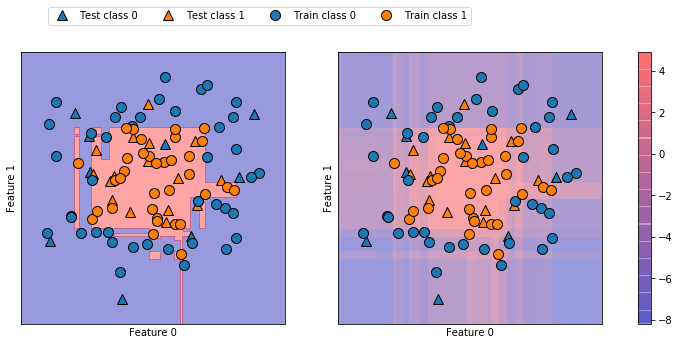

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1', 'Train class 0', 'Train class 1'], ncol=4, loc=(.1, 1.1))

左が決定境界、右が決定関数を表している。右の決定関数では、決定境界（境目）がはっきり分からず、あまり参考にならない。

### 2.4.2　確率の予測

In [12]:
print('Shape of probabilities: {}'.format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


In [13]:
print('Predicted probabilities:\n{}'.format(gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


第1クラスの予測確率と第2クラスの予測確率を表している。つまり、行の数値を足すと、全確率の1となる。

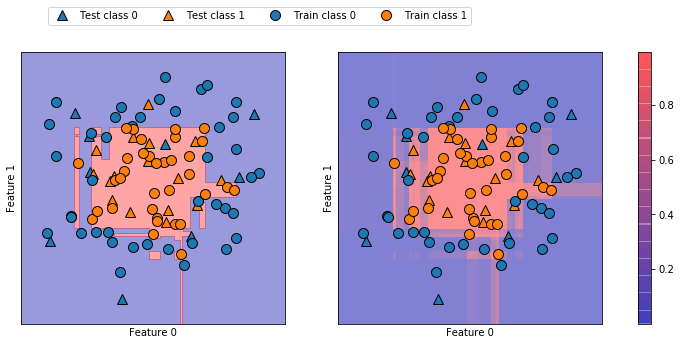

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1', 'Train class 0', 'Train class 1'], ncol=4, loc=(.1, 1.1))

決定境界と予測確率の比較をする。<br>
右の予測確率では、わずかに存在する確信度（確率）の低い領域がはっきり分かる。（赤色が薄いエリア）

### 2.4.3　多クラス分類の不確実性

In [31]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

irisデータにおける、決定関数の最初の6データを表示する。

In [32]:
print('Decision function shape: {}'.format(gbrt.decision_function(X_test).shape))

print('Decision function:\n{}'.format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


決定関数における確信度が1番高いクラスを選ぶことで、予測クラスを得ることができる。

In [33]:
print('Argmax of decision function:\n{}'.format(np.argmax(gbrt.decision_function(X_test), axis=1)))

print('Predictions:\n{}'.format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


predict_probaにおける各行の合計値は、当然1となる。axis=1で列方向（横）に計算をしている。

In [34]:
print('Predict probabilities:\n{}'.format(gbrt.predict(X_test)[:6]))

print('Sums: {}'.format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predict probabilities:
[1 0 2 1 1 0]
Sums: [1. 1. 1. 1. 1. 1.]


In [20]:
print('Argmas of predicted probabilicaties:\n{}'.format(np.argmax(gbrt.predict_proba(X_test), axis=1)))

print('Prediction:\n{}'.format(gbrt.predict(X_test)))

Argmas of predicted probabilicaties:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Prediction:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


予測値は、Decision_functionとPredict_probaにおける確信度（確率）の大きい方のクラスを選ぶことで得られるが<br>
2クラス分類におけるDecision_functionは、出力結果が1次元となってしまうため、例外的に対応できない。

In [22]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(['blue', 'red'])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

print('Decision function:\n{}'.format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


predictの結果で、クラス名が0から始める数字でなかったり、文字列で表現されている場合には<br>
decision_functionとpredict_probaに、classes_属性を使って、実際のクラス名にしてから比較すると良い。

In [46]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
named_target = iris.target_names[y_train]

print(named_target[:5])

['setosa' 'setosa' 'virginica' 'versicolor' 'versicolor']


In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, named_target)

# 訓練データ内にある、クラス名の種類を出力する
print('unique classes in training data: {}'.format(logreg.classes_))

print('predictions: {}'.format(logreg.predict(X_test)[:5]))

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)

print('argmax of decision function:{}'.format(argmax_dec_func[:5]))

# logreg.classesで、クラス名に変換している
print('argmax combined with classes: {}'.format(logreg.classes_[argmax_dec_func][:5]))

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']
argmax of decision function:[1 0 2 1 1]
argmax combined with classes: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
